In [120]:
import numpy as np
import pandas as pd
import os

In [121]:
data_path = "./dane/"
df = pd.read_csv(os.path.join(data_path, "dane_spr1.csv"), sep=';')

In [122]:
# wartość optymalizacji po poszczególnym ruchu
optimalization = pd.DataFrame(columns=["Wartosc kombinacji"])
Neighbours_count = 10
improvements = np.zeros(Neighbours_count)
np.random.seed(42)

In [123]:
# KR to wartość naszego rozwiązania - ma być najmniejsza
def get_KR(df = df):
    c_sum = df["Czas wykonania"].cumsum() # suma kumultatywna kolumny "Czas wykonania"
    KR = (df["Termin"] - c_sum)**2 # obliczanie kwadratu różnicy wartosći
    return sum(KR) # KR jest wskaźnikiem jakości ułożenia zadań. To optymalizujemy

# sprawdzone
def neighbours(idx, N = Neighbours_count, df = df):
    L = len(df) - 1
    idx_prev = idx
    N_half = N//2
    if idx < N_half:
        idx = N_half
    elif idx > L - N_half:
        idx = L - N_half
    output = list(range(idx - N_half, idx + N_half + 1))
    # TODO: usunac idx z output
    rm_idx = output.index(idx_prev)
    output = np.array(output)
    output = np.delete(output, rm_idx)
    return output

# 
def calculate_improvements(KR_before, idx, neighbours, df = df):
    for neighbour, improvement in zip(
        neighbours, 
        np.nditer(improvements, op_flags = ['readwrite'])
    ):
        swap(idx, neighbour)
        improvement[...] = np.float64(get_KR() - KR_before)
        swap(idx, neighbour)
        
# 
def search_for_the_best_neighbour():
    global improvements
    # index najmniejszego elementu
    return improvements.argmin()

# 
def get_new_idx(idx, best_neighbour, neighbours):
    return neighbours[0] if idx < best_neighbour else neighbours[-1]

# 
def swap(idx_1, idx_2, df=df):
    # zamiana miejscami dwóch wierszy "in place" - nie tworzymy nowej ramki danych
    df.iloc[idx_1], df.iloc[idx_2] = df.iloc[idx_2], df.iloc[idx_1]
    
def move(idx_1, idx_2, df=df):
    global tabu, optimalization
    swap(idx_1, idx_2) # ruch
    
def plot_optimalization():
    global optimalization
    # TODO: można to zrobić ładniej matplotlibem
    optimalization["Wartosc kombinacji"].plot(kind="line")

In [125]:
number_of_iterations = 10
idx = np.random.randint(len(df))
break_counter = 3

while number_of_iterations and break_counter:
    KR_before = get_KR()
    Neighbours = neighbours(idx)
    calculate_improvements(KR_before, idx, Neighbours)
    best_neighbour = search_for_the_best_neighbour()
    move(idx, best_neighbour)
    KR_now = get_KR()
    idx = best_neighbour
    
    if KR_before <= KR_now:
        break_counter -= 1
        continue

    # dodawanie obecnej wartości kombinacji do listy wszystkich wartości
    optimalization = optimalization.append({"Wartosc kombinacji": KR_now}, ignore_index=True)
    number_of_iterations -= 1
    

In [118]:
idx = 3
KR_before = get_KR()
Neighbours = neighbours(idx)
calculate_improvements(KR_before, idx, Neighbours)


In [119]:
KR_before
improvements
Neighbours

210851272

array([  402910.,  1870326., -1025784., -2270106.,   713130., -2587110.,
       -2399456., -1947407., -1054475.,        0.])

array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10])

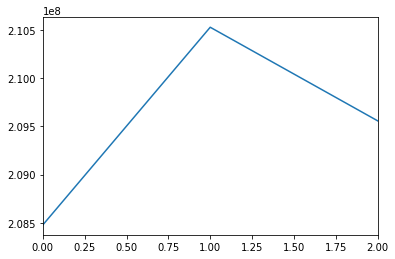

In [126]:
# źle działa
# TODO: trzeba przejść cały algorytm po kolei i sprawdzić co źle funkcjonuje
# możliwe że działa źle bo algorytm jest słaby
plot_optimalization()

In [25]:
optimalization["Wartosc kombinacji"]

0      212916396
1      212717735
2      212717735
3      212717735
4      212717735
         ...    
97     212717735
98     212717735
99     212717735
100    211194320
101    210916210
Name: Wartosc kombinacji, Length: 102, dtype: object

True
